# Sanity check

In [1]:
# !which python

/home/amar/Desktop/projects/NFS/nfs_venv/bin/python


In [2]:
# !pwd 

/home/amar/Desktop/projects/NFS


# Imports

In [1]:
import os
import traceback
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Files and Paths

In [2]:
project_dir = os.getcwd()
paths = {
    'project_dir': project_dir,
    'input_videos': os.path.join(project_dir, 'data', 'videos'),
    'output_videos': os.path.join(project_dir, 'data', 'outputs')
}

files = {
    'input_video': os.path.join(paths['input_videos'], 'highway_footage_high_res_hood.avi')
}

# Reading data

In [3]:
'paths', paths, 'files', files

('paths',
 {'project_dir': '/home/amar/Desktop/projects/NFS',
  'input_videos': '/home/amar/Desktop/projects/NFS/data/videos',
  'output_videos': '/home/amar/Desktop/projects/NFS/data/outputs'},
 'files',
 {'input_video': '/home/amar/Desktop/projects/NFS/data/videos/highway_footage_high_res_hood.avi'})

In [3]:
def show_video(dir_=None, filename=None):
    '''
    Shows a video from the path provided in a seperate window.
        Parameters:
            dir_ (str): Directory where the video exists
            filename (str): Name of the video file
        Returns:
            None
    '''
    if not dir_ or not filename:
        cap = cv.VideoCapture(files['input_video'])
    else:
        cap = cv.VideoCapture(os.path.join(dir_, filename))
    while True:
        ret, frame = cap.read()
        if ret:
            cv.imshow('Input video', frame)
        else:
            print('Video not read, exiting...')
            break
            
        if cv.waitKey(1) == ord('q'):
            print('Key pressed, exiting...')
            break
            
    cv.destroyAllWindows()
    cap.release()

In [4]:
def show_image(frame, convert=True, bigger=False):
    '''
    Shows an image using matplotlib.pyplot.
    Parameters:
        frame (np.ndarray): Array of the image pixel intensities
        convert (bool): Set True to convert from BGR to RGB
        bigger (bool): Show the image bigger.
    Returns:
        None
    '''
    if convert:
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    if bigger:
        plt.figure(figsize=(9,12))
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

In [5]:
def get_frame_from_video(video_file, frame_number=0):
    '''
    Gets a frame from the video specified.
    Parameters:
        video_file (str): path to the video file
        frame_number (int): Frame to return
    Returns:
        result_frame (np.ndarray): The pixel intensity values of the frame in BGR format
    '''
    cap = cv.VideoCapture(video_file)
    result_frame = None
    count = 0
    while True:
        ret, frame = cap.read()
        if ret:
            if count == frame_number:
                result_frame = frame
                return result_frame
        else:
            print('File not found, exiting...')
            break
        count += 1

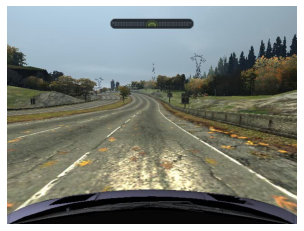

(480, 640, 3)

In [6]:
# show_video()
screenshot = get_frame_from_video(video_file=files['input_video'], frame_number=0)
show_image(screenshot, convert=True)
screenshot.shape

# Filters

## HSV

### Actual work

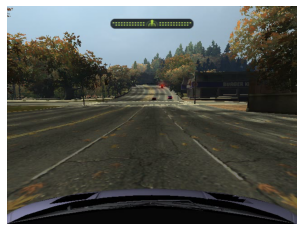

(480, 640, 3)

In [149]:
# show_video()
screenshot = get_frame_from_video(video_file=files['input_video'], frame_number=2800)
show_image(screenshot, convert=True)
screenshot.shape

In [6]:
class HSVFilter:
  def __init__(self, filter_=[None]*6):
    '''
    Parameters:
      self
      filter_ (list): [hmin, hmax, smin, smax, vmin ,vmax]
    '''
    self.hmin = filter_[0]
    self.hmax = filter_[1]
    self.smin = filter_[2]
    self.smax = filter_[3]
    self.vmin = filter_[4]
    self.vmax = filter_[5]
        
  def apply_filter(self, original_image):
    '''
    Applies the hsv filter to the image and converts it back to BGR
    Parameters:
        original_image (np.ndarray): The image pixel intensity values.
    Returns:
        result (np.ndarray): The image pixel intensity values for the converted image
    '''
    image_hsv = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)
    
    lower = np.array([self.hmin, self.smin, self.vmin])
    upper = np.array([self.hmax, self.smax, self.vmax])
    
    mask = cv.inRange(image_hsv, lower, upper)
    image_threshold = cv.bitwise_and(image_hsv, image_hsv, mask=mask)
    result = cv.cvtColor(image_threshold, cv.COLOR_HSV2BGR)
    
    return result
      
  def get_new_filter(self, window_name='Trackbars'):
    '''
    Returns the new initialized state of the filter
    Parameters:
    self (HSVFilter object): The filter that takes the information from the trackbar window.
    window_name (str): Name of the trackbar window.
    Returns:
    filter_object (HSVFilter object): The filter with new initialized values
    '''
    self.hmin = cv.getTrackbarPos('Hmin', window_name)
    self.hmax = cv.getTrackbarPos('Hmax', window_name)
    self.smin = cv.getTrackbarPos('Smin', window_name)
    self.smax = cv.getTrackbarPos('Smax', window_name)
    self.vmin = cv.getTrackbarPos('Vmin', window_name)
    self.vmax = cv.getTrackbarPos('Vmax', window_name)
    
    # return self
  
  @staticmethod  
  def nothing(position):
    '''
    I do nothing.
    Parameters:
        position
    '''
    pass
  
  @staticmethod
  def create_trackbar_window(window_name='Trackbars'):
    '''
    Creates the trackbar in the window_name specified.
    Parameters:
        window_name (str): Window name for the trackbar window.
    Returns:
        None
    '''
    cv.createTrackbar('Hmin', window_name, 25, 179, HSVFilter.nothing)
    cv.createTrackbar('Hmax', window_name, 45, 179, HSVFilter.nothing)
    cv.createTrackbar('Smin', window_name, 0, 255, HSVFilter.nothing)
    cv.createTrackbar('Smax', window_name, 225, 255, HSVFilter.nothing)
    cv.createTrackbar('Vmin', window_name, 175, 255, HSVFilter.nothing)
    cv.createTrackbar('Vmax', window_name, 255, 255, HSVFilter.nothing)

In [9]:
original_window_name = 'Original image'
thresholded_window_name = 'Thresholded image'
trackbar_window_name = 'Trackbars'
base_filter = [25, 45, 0, 255, 175, 255]

try:
    cv.namedWindow(thresholded_window_name)
    cv.namedWindow(trackbar_window_name)
    HSVFilter.create_trackbar_window(trackbar_window_name)
  
    hsv_filter = HSVFilter(base_filter)
  
    cap = cv.VideoCapture(files['input_video'])
    test_frame = get_frame_from_video(files['input_video'], frame_number=2500)
    result_frame = None
  
    while True:
        # FOR IMAGES
        hsv_filter.get_new_filter()
        filtered_frame = hsv_filter.apply_filter(test_frame)
        cv.imshow(thresholded_window_name, filtered_frame)
        result_frame = filtered_frame
        if cv.waitKey(10) == ord('q'):
            break
    
        # FOR VIDEOS
#         ret, frame = cap.read()
#         if ret:
#             # hsv_filter = get_new_filter(hsv_filter)
#             filtered_frame = hsv_filter.apply_filter(frame)
# #             cv.imshow(original_window_name, frame)
#             cv.imshow(thresholded_window_name, filtered_frame)
#             if cv.waitKey(1) == ord('q'):
#                     break
#         else:
#             print('Video not read, Exiting...')
#             cv.destroyAllWindows()
#             break
    
    cv.destroyAllWindows()
except Exception as e:
    print('Inside except')
    print(traceback.format_exc())
    cv.destroyAllWindows()
    # print(e)


### Experiments

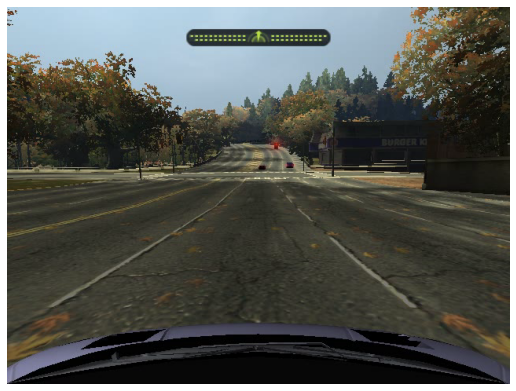

(480, 640, 3)

In [10]:
screenshot = get_frame_from_video(video_file=files['input_video'], frame_number=2800)
show_image(screenshot, convert=True, bigger=True)
screenshot.shape
# show_image(result_frame, convert=True, bigger=True)

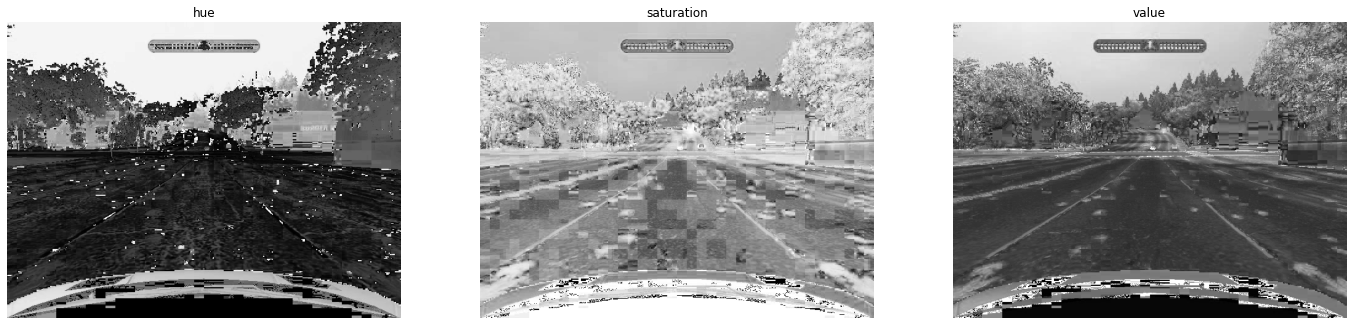

In [14]:
screenshot = cv.cvtColor(screenshot, cv.COLOR_BGR2HSV)
h, s, v = cv.split(screenshot)

fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.set(title='hue')
ax2.set(title='saturation')
ax3.set(title='value')

ax1.imshow(h, cmap='gray')
ax2.imshow(s, cmap='gray')
ax3.imshow(v, cmap='gray')

plt.show()

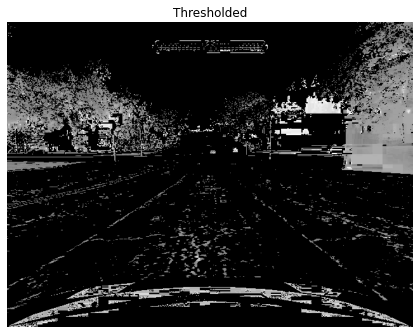

In [62]:
# ret, thresholded_frame = cv.threshold(s, 175, 1, cv.THRESH_BINARY)
mask = cv.inRange(h, 45, 100)
image_threshold = cv.bitwise_and(h, h, mask=mask)

fig = plt.figure(figsize=(16, 8))

ax2 = fig.add_subplot(122)
ax2.imshow(image_threshold, cmap='gray')
ax2.set(title='Thresholded')
ax2.axis('off')

plt.show()

## LAB 

### Samples

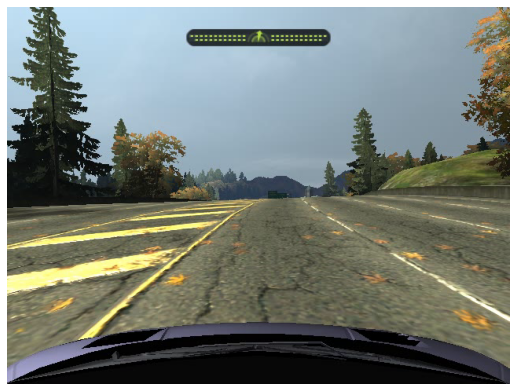

(480, 640, 3)

In [169]:
screenshot = get_frame_from_video(video_file=files['input_video'], frame_number=2500)
show_image(screenshot, convert=True, bigger=True)
screenshot.shape

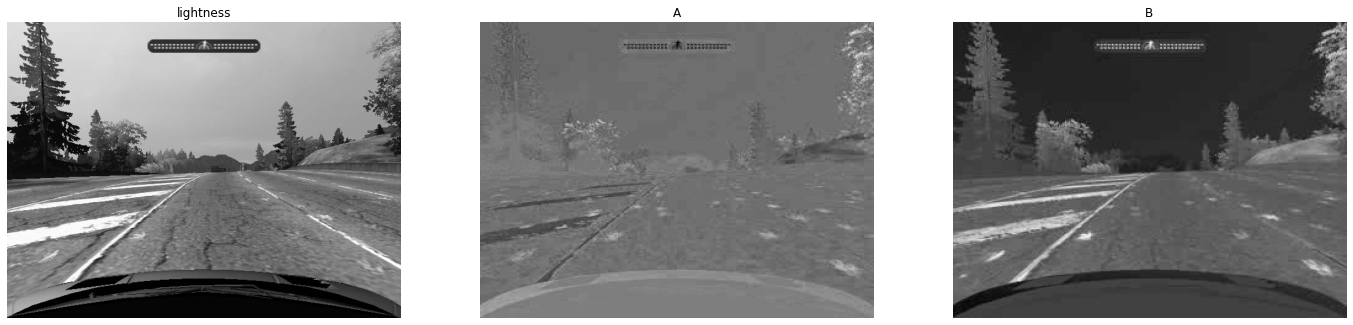

In [170]:
lab_screenshot = cv.cvtColor(screenshot, cv.COLOR_BGR2LAB)
l, a, b = cv.split(lab_screenshot)

fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.set(title='lightness')
ax2.set(title='A')
ax3.set(title='B')

ax1.imshow(l, cmap='gist_gray')
ax2.imshow(a, cmap='gist_gray')
ax3.imshow(b, cmap='gist_gray')

plt.show()

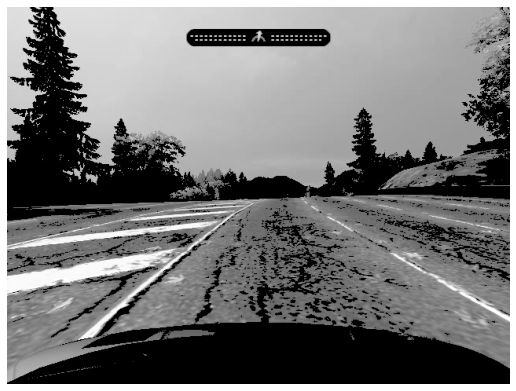

In [171]:
plt.figure(figsize=(9,12))
lower = np.array([100])
upper = np.array([255])

mask = cv.inRange(l, lower, upper)
frame_thresholded = cv.bitwise_and(l, l, mask=mask)
plt.imshow(frame_thresholded, cmap='gist_gray')
plt.axis('off')
plt.show()

### Actual work

In [154]:
class LABFilter:
    def __init__(self, filter_:list=[None]*6):
        """
        Initiates a LABFilter object
        Parameters:
          self
          filter_ (list): [lmin, lmax, amin, amax, bmin, bmax]
        """
        self.lmin = filter_[0]
        self.lmax = filter_[1]
        self.amin = filter_[2]
        self.amax = filter_[3]
        self.bmin = filter_[4]
        self.bmax = filter_[5]
    
    def apply_filter(self, original_frame:np.ndarray):
        """
        Converts the input image to lab and applies the filter.
        Parameters:
          self
          original_frame (np.ndarray): Pixel intensity values in BGR color space.
        Returns:
          result (np.ndarray): Pixel intensity values in BGR color space.
        """
        frame_lab = cv.cvtColor(original_frame, cv.COLOR_BGR2LAB)
        
        lower = np.array([self.lmin, self.amin, self.bmin])
        upper = np.array([self.lmax, self.amax, self.bmax])
        
        mask = cv.inRange(frame_lab, lower, upper)
        frame_thresholded = cv.bitwise_and(frame_lab, frame_lab, mask=mask)
        result = frame_thresholded
        # result = cv.cvtColor(frame_thresholded, cv.COLOR_LAB2BGR)
        
        return result
    
    def get_new_filter(self, window_name='Trackbars'):
        """
        Gets the filter value from the trackbar window and restates the LAB filter object
        Parameters:
            self (LABFilter object):
            window_name (str): Get the trackbar position from this window
        Returns:
            filter_object (LABFilter object): The new state of the filter object
        """
        self.lmin = cv.getTrackbarPos('Lmin', window_name)
        self.lmax = cv.getTrackbarPos('Lmax', window_name)
        self.amin = cv.getTrackbarPos('Amin', window_name)
        self.amax = cv.getTrackbarPos('Amax', window_name)
        self.bmin = cv.getTrackbarPos('Bmin', window_name)
        self.bmax = cv.getTrackbarPos('Bmax', window_name)
    
    @staticmethod
    def nothing(position):
        """
        I do nothing
        """
        pass
    
    @staticmethod
    def create_trackbar_window(window_name:str = 'Trackbars'):
        """
        Creates trackbar in the window name specified.
        Parameters:
          window_name (str): The name of the window to make the trackbars in
        Returns:
          None
        """
        cv.createTrackbar('Lmin', window_name, 0, 255, LABFilter.nothing)
        cv.createTrackbar('Lmax', window_name, 255, 255, LABFilter.nothing)
        cv.createTrackbar('Amin', window_name, 0, 255, LABFilter.nothing)
        cv.createTrackbar('Amax', window_name, 255, 255, LABFilter.nothing)
        cv.createTrackbar('Bmin', window_name, 0, 255, LABFilter.nothing)
        cv.createTrackbar('Bmax', window_name, 255, 255, LABFilter.nothing)

In [155]:
original_window_name = 'Original'
thresholded_window_name = 'Thresholded'
trackbar_window_name = 'Trackbars'
base_filter = [0]*6
yellow_filter = [0, 255, 0, 255, 150, 255]

try:
    cv.namedWindow(thresholded_window_name)
    cv.namedWindow(trackbar_window_name)
#     LABFilter.create_trackbar_window()
    
    lab_filter = LABFilter(yellow_filter)
    
    cap = cv.VideoCapture(files['input_video'])
#     test_frame = get_frame_from_video(files['input_video'], frame_number=2800)
    result_frame = None
    
    while True:
        # FOR IMAGES
#         lab_filter.get_new_filter()
#         filtered_frame = lab_filter.apply_filter(test_frame)
# #         cv.imshow(original_window_name, test_frame)
#         cv.imshow(thresholded_window_name, filtered_frame)
#         result_frame = filtered_frame
#         if cv.waitKey(10) == ord('q'):
#             break
    
#         FOR VIDEOS
        ret, frame = cap.read()
        if ret:
#             lab_filter.get_new_filter()
            filtered_frame = lab_filter.apply_filter(frame)
#             cv.imshow(original_window_name, frame)
            cv.imshow(thresholded_window_name, filtered_frame)
            if cv.waitKey(1) == ord('q'):
                    break
        else:
            print('Video not read, Exiting...')
            cv.destroyAllWindows()
            break
    cv.destroyAllWindows()
except Exception as e:
    print('Inside except')
    print(traceback.format_exc())
    cv.destroyAllWindows()


Video not read, Exiting...


## HSL

### Samples

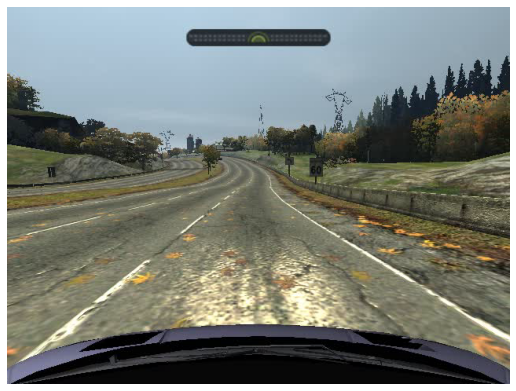

In [7]:
screenshot = get_frame_from_video(files['input_video'], frame_number=0)
show_image(screenshot, bigger=True)

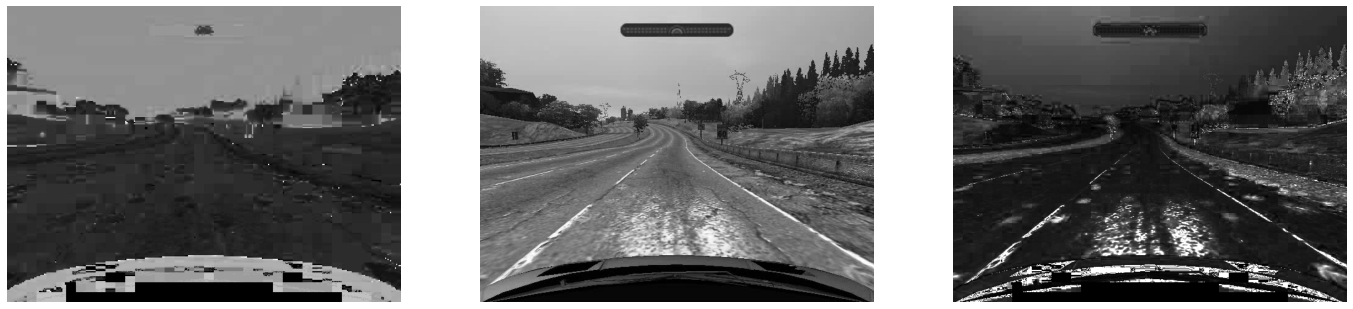

In [18]:
screenshot_hls = cv.cvtColor(screenshot, cv.COLOR_BGR2HLS)
h, l, s = cv.split(screenshot_hls)

fig = plt.figure(figsize=(24, 8))

ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

ax0.imshow(h, cmap='gray')
ax1.imshow(l, cmap='gray')
ax2.imshow(s, cmap='gray')

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')

plt.show()

### Actual work

In [35]:
class HLSFilter:
  def __init__(self, filter_=[None]*6):
    '''
    Parameters:
      self
      filter_ (list): [hmin, hmax, lmin, lmax, smin ,smax]
    '''
    self.hmin = filter_[0]
    self.hmax = filter_[1]
    self.lmin = filter_[2]
    self.lmax = filter_[3]
    self.smin = filter_[4]
    self.smax = filter_[5]
        
  def apply_filter(self, original_image):
    '''
    Applies the hsv filter to the image and converts it back to BGR
    Parameters:
        original_image (np.ndarray): The image pixel intensity values.
    Returns:
        result (np.ndarray): The image pixel intensity values for the converted image
    '''
    image_hls = cv.cvtColor(original_image, cv.COLOR_BGR2HLS)
    
    lower = np.array([self.hmin, self.lmin, self.smin])
    upper = np.array([self.hmax, self.lmax, self.smax])
    
    mask = cv.inRange(image_hls, lower, upper)
    image_threshold = cv.bitwise_and(image_hls, image_hls, mask=mask)
    result = cv.cvtColor(image_threshold, cv.COLOR_HLS2BGR)
    
    return result
      
  def get_new_filter(self, window_name='Trackbars'):
    '''
    Returns the new initialized state of the filter
    Parameters:
    self (HSVFilter object): The filter that takes the information from the trackbar window.
    window_name (str): Name of the trackbar window.
    Returns:
    filter_object (HSVFilter object): The filter with new initialized values
    '''
    self.hmin = cv.getTrackbarPos('Hmin', window_name)
    self.hmax = cv.getTrackbarPos('Hmax', window_name)
    self.lmin = cv.getTrackbarPos('Lmin', window_name)
    self.lmax = cv.getTrackbarPos('Lmax', window_name)
    self.smin = cv.getTrackbarPos('Smin', window_name)
    self.smax = cv.getTrackbarPos('Smax', window_name)
    
    # return self
  
  @staticmethod  
  def nothing(position):
    '''
    I do nothing.
    Parameters:
        position
    '''
    pass
  
  @staticmethod
  def create_trackbar_window(window_name='Trackbars'):
    '''
    Creates the trackbar in the window_name specified.
    Parameters:
        window_name (str): Window name for the trackbar window.
    Returns:
        None
    '''
    cv.createTrackbar('Hmin', window_name, 0, 179, HLSFilter.nothing)
    cv.createTrackbar('Hmax', window_name, 50, 179, HLSFilter.nothing)
    cv.createTrackbar('Lmin', window_name, 75, 255, HLSFilter.nothing)
    cv.createTrackbar('Lmax', window_name, 255, 255, HLSFilter.nothing)
    cv.createTrackbar('Smin', window_name, 125, 255, HLSFilter.nothing)
    cv.createTrackbar('Smax', window_name, 255, 255, HLSFilter.nothing)

In [42]:
original_window_name = 'Original image'
thresholded_window_name = 'Thresholded image'
thresholded_windows = ['Initial', 'Yellow', 'Shadow']
trackbar_window_name = 'Trackbars'
base_filter = [0, 50, 175, 255, 125, 255]

try:
    cv.namedWindow(thresholded_window_name)
    cv.namedWindow(trackbar_window_name)
#     HLSFilter.create_trackbar_window(trackbar_window_name)
  
    hls_filter = HLSFilter(base_filter)
  
    cap = cv.VideoCapture(files['input_video'])
#     test_frame_initial = get_frame_from_video(files['input_video'], frame_number=0)
#     test_frame_yellow = get_frame_from_video(files['input_video'], frame_number=2500)
#     test_frame_shadow = get_frame_from_video(files['input_video'], frame_number=2800)
    result_frame = None
  
    while True:
        # FOR IMAGES
#         hls_filter.get_new_filter()
        
#         filtered_frame_initial = hls_filter.apply_filter(test_frame_initial)
#         filtered_frame_yellow = hls_filter.apply_filter(test_frame_yellow)
#         filtered_frame_shadow = hls_filter.apply_filter(test_frame_shadow)
        
#         filtered_frame_initial = cv.resize(filtered_frame_initial, 
#                                            (filtered_frame_initial.shape[1]//2, filtered_frame_initial.shape[0]//2))
#         filtered_frame_yellow = cv.resize(filtered_frame_yellow, 
#                                            (filtered_frame_yellow.shape[1]//2, filtered_frame_yellow.shape[0]//2))
#         filtered_frame_shadow = cv.resize(filtered_frame_shadow, 
#                                            (filtered_frame_shadow.shape[1]//2, filtered_frame_shadow.shape[0]//2))
        
#         cv.imshow(thresholded_windows[0], filtered_frame_initial)
#         cv.imshow(thresholded_windows[1], filtered_frame_yellow)
#         cv.imshow(thresholded_windows[2], filtered_frame_shadow)
        
#         result_frame = filtered_frame
#         if cv.waitKey(10) == ord('q'):
#             break
    
        # FOR VIDEOS
        ret, frame = cap.read()
        if ret:
            # hls_filter = get_new_filter(hls_filter)
            filtered_frame = hls_filter.apply_filter(frame)
            cv.imshow(original_window_name, frame)
            cv.imshow(thresholded_window_name, filtered_frame)
            if cv.waitKey(1) == ord('q'):
                    break
        else:
            print('Video not read, Exiting...')
            cv.destroyAllWindows()
            break
    
    cv.destroyAllWindows()
except Exception as e:
    print('Inside except')
    print(traceback.format_exc())
    cv.destroyAllWindows()
    # print(e)


Video not read, Exiting...


## Normalized pixel values (Transformed color space)

### Samples

In [50]:
# Basics
a = np.array([1,2,3])
mean_a = np.mean(a)
std_a = np.std(a)
mean_a, std_a
(a-mean_a)/std_a

array([-1.22474487,  0.        ,  1.22474487])

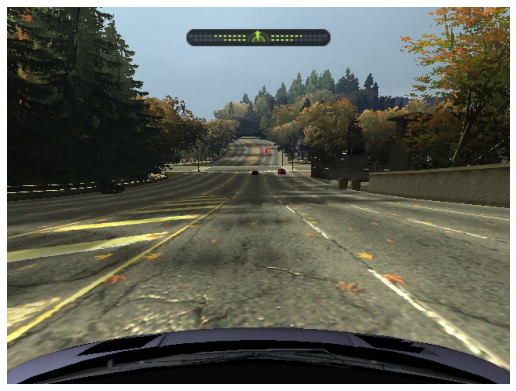

In [52]:
screenshot = get_frame_from_video(files['input_video'], frame_number=2750)
show_image(screenshot, bigger=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


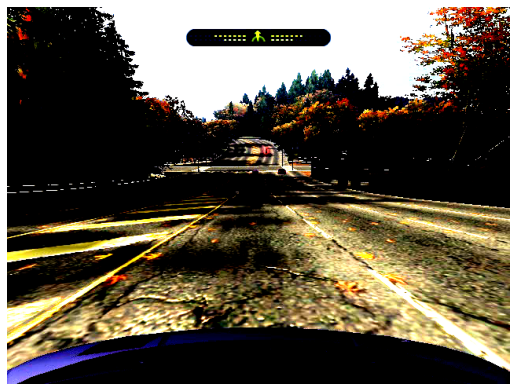

In [60]:
b, g, r = cv.split(screenshot)

b_norm = (b - np.mean(b))/np.std(b)
g_norm = (g - np.mean(g))/np.std(g)
r_norm = (r - np.mean(r))/np.std(r)

# result = cv.merge([b_norm, g_norm, r_norm])
result = cv.merge([r_norm, g_norm, b_norm])
result = np.float32(result)
show_image(result, bigger=True, convert=False)
# result.shape

# Conclusions

# Miscellaneous attempts at white lane detection in shadows

## Gradient 

In [32]:
image = get_frame_from_video(files['input_video'], frame_number=2800)

In [35]:
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

sobelx64f = cv.Sobel(image_gray,cv.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

# ret, thresh = cv.threshold(sobel_8u, 100, 255, cv.THRESH_BINARY)
thresh = cv.adaptiveThreshold(sobel_8u,100,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

cv.imshow('Test', thresh)
if cv.waitKey(0) == ord('q'):
    cv.destroyAllWindows()
# plt.imshow(sobel_8u, cmap='gray')
# plt.axis('off')